In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Potential energy

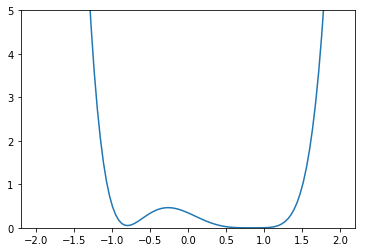

In [2]:
def potential(x):
    a = x - 0.8
    b = x - 0.9
    c = x + 0.8
    u = a * b * c
    energy = u**2 + 0.02 * (x - 0.8)**2
    grad = 2 * u * (a * b + b * c + c * a) + 0.04 * (x - 0.8)
    force = -grad
    return energy, force

x = np.linspace(-2, 2, num=100)
e, f = potential(x)

plt.plot(x, e)
plt.ylim(0, 5)

pass

# Langevin simulation

In [3]:
n_trajectories = 100
n_steps = 10000
timestep = 0.03

mobility = 1.0
temperature = 0.5
sigma = np.sqrt(2 * mobility * temperature)

initial_positions = np.linspace(-0.5, 0.5, num=n_trajectories)

In [4]:
def plot_histogram(traj):
    bins = np.linspace(-2, 2, num=67)
    xs = np.linspace(-3, 3, num=200)

    e, _ = potential(xs)
    boltz = np.exp(-e / temperature)
    boltz /= boltz.sum()
    scale = traj.size * (bins[1] - bins[0]) / (xs[1] - xs[0])

    plt.hist(traj.ravel(), bins=bins)
    plt.plot(xs, boltz * scale)

## Euler-Maruyama scheme

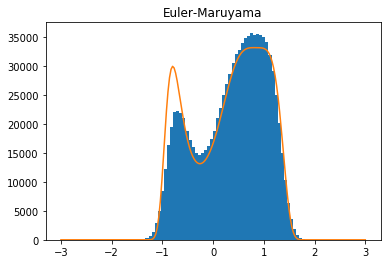

In [5]:
xs = np.zeros((n_trajectories, n_steps), dtype=np.float64)

xs[:, 0] = initial_positions

for i in range(1, n_steps):
    xs[:, i] = xs[:, i - 1]

    _, fs = potential(xs[:, i])
    xs[:, i] += mobility * fs * timestep

    wiener = np.random.normal(0, np.sqrt(timestep), size=n_trajectories)
    xs[:, i] += sigma * wiener

euler_maruyama_trajectories = xs
plot_histogram(euler_maruyama_trajectories)
plt.title('Euler-Maruyama')

pass

## BAOAB limit scheme

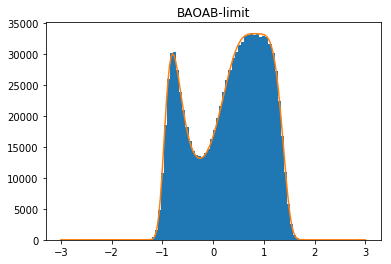

In [6]:
xs = np.zeros((n_trajectories, n_steps), dtype=np.float64)

xs[:, 0] = initial_positions
prev_wiener = np.random.normal(0, np.sqrt(timestep), size=n_trajectories)

for i in range(1, n_steps):
    xs[:, i] = xs[:, i - 1]

    _, fs = potential(xs[:, i])
    xs[:, i] += fs * mobility * timestep

    wiener = np.random.normal(0, np.sqrt(timestep), size=n_trajectories)
    xs[:, i] += (sigma / 2) * (prev_wiener + wiener)

    prev_wiener = wiener

my_b_trajectories = xs
plot_histogram(my_b_trajectories)
plt.title('BAOAB-limit')

pass